# Exercise 1

## Exercise 1.1

write a code that prints the following pattern. Try to use as few loops as possible.

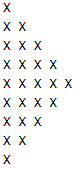

Avoid using trivial solutions like:

print('X')

print('X X')

print('X X X')

.....

print('X X X')

print('X X')

print('X')


In [4]:
for i in range(5):
    print('X'* i)
for i in range (4, 0, -1):
    print('X'* i)



X
XX
XXX
XXXX
XXXX
XXX
XX
X


## Exercise 1.2

Write a script that will sum all numbers in the following string. You can split each number into single digits, so for example, you can consider 45 to be 4 and 5

In [6]:
input_str = "n45as29@#8ss6"
total = 0

for i in input_str:
  if i.isdigit():
    total += int(i)

print(total)

34


## Exercise 1.3

Write a script that will convert an arbitrary integer to a binary number (the number will be represented as a string with only *0* and *1*). Avoid using the *bin()* function or any other pythons default functions

In [7]:
def int_to_binary(n):
    if n == 0:
        return "0"

    is_negative = n < 0
    n = abs(n)

    binary = ""

    while n > 0:
        remainder = n % 2
        binary = str(remainder) + binary
        n = n // 2

    if is_negative:
        binary = "-" + binary

    return binary


num = int(input("Enter an integer: "))
print("Binary:", int_to_binary(num))

Enter an integer: 48
Binary: 110000


## Exercise 1.4 - The Fibonacci Sequence:

The Fibonacci Sequence is a series of numbers. The following number is found by adding up the two numbers before it. The first two numbers are 0 and 1. For example, 0, 1, 1, 2, 3, 5, 8, 13. The following number in this series above is 8 + 13 = 21


Your task is to implement a function *fibonacci* that takes an integer as an input and returns a list that contains all Fibonacci numbers with values lower than the input integer

Example:

*print(fibonaci(10))*

[0, 1, 1, 2, 3, 5, 8]


In [11]:
def fibonacci(upper_threshold: int) -> list:
    result = []
    a, b = 0, 1

    while a <upper_threshold:
        result.append(a)
        a, b = b, a + b
    return result

print(fibonacci(10))

[0, 1, 1, 2, 3, 5, 8]


#### Advanced

Try to implement the function using multiple approaches: *Iterative approach*, *Recusrion*, *Memoization*

## Exercise 1.5. -  Rock, Paper, Scissors game:

#### basic

*Rock, Paper, Scissors* is a well-known and straightforward game. If you do not know the rules, google them. We will write a code for the Rock, Paper, Scissors game where the user plays against a random computer. The code can be written into one function *rock_paper_scissors*.

Notes:
- This implementation uses the **random** library to enable the computer to make a random choice.
- Keyword **Input** may be helpful. Check it
- After the function is run, the program will ask you about your movement, which you type in
- The game is case-insensitive for user input (e.g., "rock", "Rock", and "ROCK" are all valid).
- This script plays one round of the game.
- The script prints the result ('You lose', 'You win', 'It is a tie')


In [12]:
import random

def rock_paper_scissors() -> None:
    choices = ["rock", "paper", "scissors"]

    user = input("Enter rock, paper, or scissors: ").strip().lower()

    if user not in choices:
        print("Invalid choice!")
        return

    computer = random.choice(choices)
    print("Computer chose:", computer)

    if user == computer:
        print("It is a tie")
    elif (
        (user == "rock" and computer == "scissors") or
        (user == "paper" and computer == "rock") or
        (user == "scissors" and computer == "paper")
    ):
        print("You win")
    else:
        print("You lose")


rock_paper_scissors()

Enter rock, paper, or scissors: rock
Computer chose: paper
You lose


#### Advanced

Extend the Rock, Paper, Scissors game to be able to play *n* rounds.

Notes:
- The scrips will contain two counters - user score and computer score
- After each run, the script prints the current scores and rounds.
- When the number of rounds is reached, the script prints the result ('You lose', 'You win', 'It is a tie')

# Exercise 2

The purpose of this excercise is to practise working with NumPy library

## Exercise 2.1


In this exercise, you will work with NumPy arrays and learn how to efficiently modify and process them using both loops and vectorized operations. Your task is to:

1. Implement the function *create_array_nxn* that generates an n×n NumPy array filled with numbers from n² - 1 down to 0
2. Using a loop-based approach (for-loop, while-loop), implement the function *apply_threshold_loop* that takes any NumPy array and replaces all numbers below a user-defined threshold with 0.
3. Implement function *apply_threshold_vectorized* that performs the same operation as *apply_threshold_loop*, but without loops, using NumPy vectorized operations
4. Implement function *compare_performance* that compares the execution time of functions *apply_threshold_vectorized* and *apply_threshold_loop* with **time** library and print the results


**Additional Notes**:

- Ensure n is a positive integer (n > 0).
- Use the time library to measure execution times for performance comparison.
- The function *compare_performance(n, threshold)* should:
    - Generate an n×n array.
    - Apply both loop-based and vectorized thresholding.
    - Print execution times.

In [21]:
import numpy as np
import time

In [22]:
def create_array_nxn(n: int) -> np.ndarray:
    if not isinstance(n, int) or n <= 0:
        raise ValueError("n must be a positive integer (n > 0).")
    return np.arange(n*n - 1, -1, -1).reshape(n, n)

In [23]:
def apply_threshold_loop(arr: np.ndarray, threshold: int) -> np.ndarray:
    out = arr.copy()
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            if out[i, j] < threshold:
                out[i, j] = 0
    return out

In [24]:
def apply_threshold_vectorized(arr: np.ndarray, threshold: int) -> np.ndarray:
    out = arr.copy()
    out[out < threshold] = 0
    return out

In [25]:
def compare_performance(n: int, threshold: int) -> None:
    arr = create_array_nxn(n)

    t0 = time.time()
    _ = apply_threshold_loop(arr, threshold)
    t1 = time.time()

    t2 = time.time()
    _ = apply_threshold_vectorized(arr, threshold)
    t3 = time.time()

    print(f"Loop-based time:       {t1 - t0:.6f} seconds")
    print(f"Vectorized time:       {t3 - t2:.6f} seconds")

## Exercise 2.2 - Digi display

#### basic

The task will be to create a simulation of a Digi display that will be able to display an arbitrary integer
   
*hint: to show the image, use the library matplotlib.pyplot. Also, you may find function *np.concatenate* helpful

In [26]:
numbs = {
      "1": np.array([[0, 1, 1], [1, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]), # 1
      "2": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1]]), # 2
      "3": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 3
      "4": np.array([[1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 0, 1]]), # 4
      "5": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 5
      "6": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1]]), # 6
      "7": np.array([[1, 1, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]), # 7
      "8": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1]]), # 8
      "9": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 9
      "0": np.array([[1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1]]), # 0
  }

In [33]:
import matplotlib.pyplot as plt

def show_in_digi(input_integer: int) -> None:
    s = str(input_integer)

    # space between digits
    gap = np.zeros((5,1), dtype=int)

    result = None

    for digit in s:
        if digit not in numbs:
            raise ValueError("Only digits are allowed")

        if result is None:
            result = numbs[digit]
        else:
            result = np.concatenate((result, gap, numbs[digit]), axis=1)

    plt.imshow(result, cmap="gray")
    plt.show()

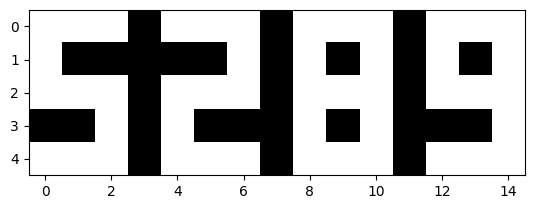

In [34]:
show_in_digi(5289)

show_in_digi(5289) will show:


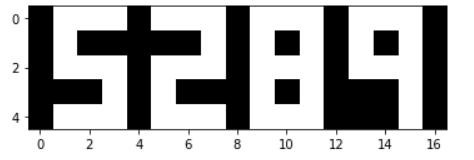

*hint2: you may find the following dict usefull*

In [ ]:
numbs = {
      "1": np.array([[0, 1, 1], [1, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]), # 1
      "2": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1]]), # 2
      "3": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 3
      "4": np.array([[1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 0, 1]]), # 4
      "5": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 5
      "6": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1]]), # 6
      "7": np.array([[1, 1, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]), # 7
      "8": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1]]), # 8
      "9": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 9
      "0": np.array([[1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1]]), # 0
  }

#### advanced

Extend your *show_in_digi* function to be able to display an arbitary float number and negative numbers

# Exercise 3 - Playing with California Housing Dataset

The purpose of this exercise is to learn basic operations of **pandas** library. Use *california_housing_dataset* you can find in google colab to do following operations:

- check what *dataset.describe()* does

- display all rows where *total_bedrooms* column is bigger than 310

- drop also first and last row

- save a mean of values in *households* columns to variable, using *matplotlib* display number of households in the graph (x-axis would be ID, y-axis - numbers of households) as dots with the same color, display also mean as a single line in the graph with different color as dots is

 - check if any of the columns contain NaN values, if yes, replace the NaN values with the arithmetic mean of the whole dataset

 - display *lat* and *long* into plot, *lat* would be on *x* axis and *long* on *y* axis

- choose two arbitrary columns and normalize all values inside using *min-max normalization*:

- Create a Correlation Matrix from all columns

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/sample_data/california_housing_train.csv")
df.head()

df. describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [36]:
df_bed = df[df["total_bedrooms"] > 310]
df_bed

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
...,...,...,...,...,...,...,...,...,...
16994,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417,76100.0
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0


In [37]:
df_bed = df_bed.iloc[1:-1]
df_bed

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
...,...,...,...,...,...,...,...,...,...
16993,-124.23,40.54,52.0,2694.0,453.0,1152.0,435.0,3.0806,106700.0
16994,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417,76100.0
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0


In [38]:
mean_house = df["households"].mean()
print(mean_house)

501.2219411764706


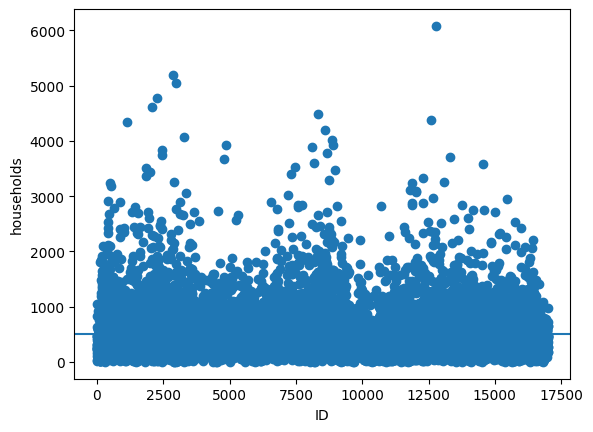

In [39]:
plt.scatter(df.index, df["households"])
plt.axhline(mean_house)   # 평균선
plt.xlabel("ID")
plt.ylabel("households")
plt.show()

In [41]:
print(df.isna().sum())

df = df.fillna(df.mean(numeric_only=True))

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


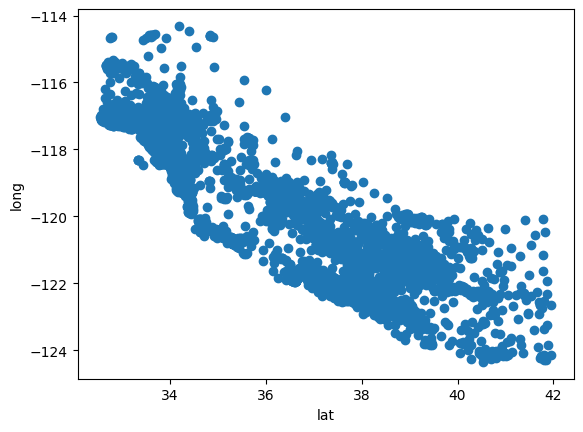

In [42]:
plt.scatter(df["latitude"], df["longitude"])
plt.xlabel("lat")
plt.ylabel("long")
plt.show()

In [43]:
cols = ["median_income", "total_rooms"]

for c in cols:
    df[c+"_norm"] = (df[c]-df[c].min())/(df[c].max()-df[c].min())

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_income_norm,total_rooms_norm
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,0.068530,0.147885
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,0.091040,0.201608
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0.079378,0.018927
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,0.185639,0.039515
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,0.098281,0.038276


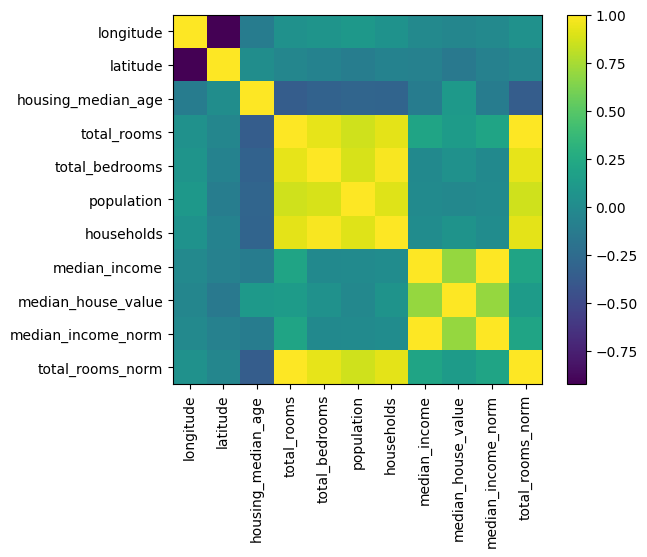

In [44]:
corr = df.corr(numeric_only=True)
corr

plt.imshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()